# Personal Project - Netflix Daily Top Ten

I found a dataset on Kaggle with daily top ten data for Netflix content in the United States from 2020 to 2022. I know that I watched a lot more Netflix in lockdown, so I thought it would be interesting to explore the dataset to draw insights about what Americans were watching during this time while practicing my data analysis skills. 

Here is the Kaggle link: https://www.kaggle.com/datasets/prasertk/netflix-daily-top-10-in-us

Info about the dataset from the source:
"The Days in Top 10 column shows the total days this program has been in the top 10, not necessarily consecutively. The Viewership Score is a score assigned to each show based on its historical daily ranking, assigning 10 points for each no. 1 ranking, 9 points for each no. 2 ranking etc"

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# create the dataframe
df = pd.read_csv("netflix daily top 10.csv")

In [3]:
# display the top 5 rows to get an idea of the data
df.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [4]:
# check the initial number of rows and columns
df.shape

(7100, 10)

In [25]:
# check for duplicates
df.drop_duplicates()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


In [6]:
# gather information on the dataset
#.info() returns: 
#name of the column, Non-null Count meaning how many non-null values their are in that column and Dtype
#int64 means int value, float64 means float value, object means string value.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


From the above output, I can see that the column "Netflix Exclusive" has several null values. I will note this for cleaning later. I will make a visualization for the missing data below.

<Axes: >

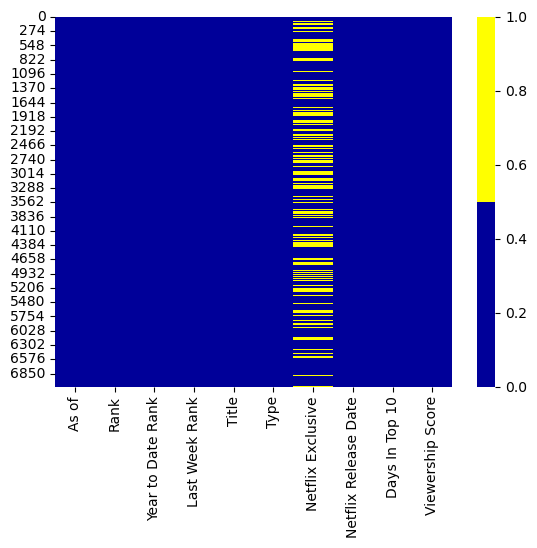

In [7]:
# plot a heatmap of any missing data
# Plot a heatmap of any missing data
cols = df.columns
colors = ['#000099', '#ffff00'] # specify the colors - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))

In [8]:
# determine what percentage of data is missing 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

As of - 0%
Rank - 0%
Year to Date Rank - 0%
Last Week Rank - 0%
Title - 0%
Type - 0%
Netflix Exclusive - 35%
Netflix Release Date - 0%
Days In Top 10 - 0%
Viewership Score - 0%


In [9]:
# explore the data in the column with missing data
df["Netflix Exclusive"].value_counts()

Yes    4599
Name: Netflix Exclusive, dtype: int64

Luckily, this field will not be crucial to my data analysis, so I can move forward in examining the rest of the data.

In [10]:
df[df['Netflix Exclusive'].isna()].sample(3)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
7037,2022-03-05,8,7,-,Shrek 2,Movie,NaN,"Mar 1, 2022",4,16
6486,2022-01-09,7,7,-,The Longest Yard,Movie,NaN,"Apr 1, 2015",5,19
2045,2020-10-22,6,9,-,Tremors: Shrieker Island,Movie,NaN,"Oct 20, 2020",2,7


In [11]:
# what were the counts for each title?
df['Title'].value_counts()

Cocomelon                       428
Ozark                            85
Cobra Kai                        81
Manifest                         80
The Queenâs Gambit             73
                               ... 
The Office                        1
Animals on the Loose: A You…      1
Dark                              1
The Secret Life of Pets 2         1
Step Up Revolution                1
Name: Title, Length: 645, dtype: int64

In [48]:
# The Queen's Gambit is displaying weird. I will fix
# df['Title'].replace('The Queenâs Gambit', "The Queen's Gambit")

In [12]:
ozark_vrwshp = df.loc[df['Title'] == 'Ozark', 'Viewership Score']
ozark_vrwshp

1        45
11       54
21       63
31       72
41       81
       ... 
6954    524
6967    527
6979    528
6986    532
6996    536
Name: Viewership Score, Length: 85, dtype: int64

In [13]:
ozark_date = df.loc[df['Title'] == 'Ozark', 'As of']
ozark_date

1       2020-04-01
11      2020-04-02
21      2020-04-03
31      2020-04-04
41      2020-04-05
           ...    
6954    2022-02-25
6967    2022-02-26
6979    2022-02-27
6986    2022-02-28
6996    2022-03-01
Name: As of, Length: 85, dtype: object

In [14]:
# convert objects to dataframes so I can join them
ozark_vrwshp = pd.DataFrame(ozark_vrwshp)
ozark_date = pd.DataFrame(ozark_date)

In [15]:
# join the two tables
ozark_trend = ozark_vrwshp.join(ozark_date)
ozark_trend

,Viewership Score,As of
1,45,2020-04-01
11,54,2020-04-02
21,63,2020-04-03
31,72,2020-04-04
41,81,2020-04-05
...,...,...
6954,524,2022-02-25
6967,527,2022-02-26
6979,528,2022-02-27
6986,532,2022-02-28


In [16]:
# get data for quantative data
df.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


In [27]:
# now for qualitative data
df.describe(include='object')

,As of,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date
count,7100,7100,7100,7100,7100,4599,7100
unique,710,11,11,645,4,1,414
top,2020-04-01,-,-,Cocomelon,TV Show,Yes,"Jun 1, 2020"
freq,10,859,3968,428,4446,4599,438


In [17]:
# aggregate some of the above by type 
type_vs = df[['Type','Viewership Score']].groupby('Type').mean()

In [18]:
type_rank = df[['Type','Rank']].groupby('Type').mean()

In [19]:
type_topten = df[['Type','Days In Top 10']].groupby('Type').mean()

In [20]:
# join the dfs above into one
df1 = type_vs.join(type_rank)

In [21]:
# display the average value of each column for each Type
df1 = df1.join(type_topten)
df1

,Viewership Score,Rank,Days In Top 10
Type,,,
Concert/Perf…,12.000000,3.500000,1.500000
Movie,38.948679,5.635006,5.990425
Stand-Up Comedy,38.585366,5.439024,5.609756
TV Show,172.854026,5.422177,34.953666


From the above output, I can tell that, on average, TV shows far outlast other types of content (movies, stand-up comedy specials, and concert/performances) in the top ten list. I will make a visualization.

In [22]:
# convert index (containing Type values) to a column so we can use it in the plot below
df1['Type']=df1.index
df1

,Viewership Score,Rank,Days In Top 10,Type
Type,,,,
Concert/Perf…,12.000000,3.500000,1.500000,Concert/Perf…
Movie,38.948679,5.635006,5.990425,Movie
Stand-Up Comedy,38.585366,5.439024,5.609756,Stand-Up Comedy
TV Show,172.854026,5.422177,34.953666,TV Show


How long did each type of content stay in the top ten list (on average)?

[Text(0.5, 1.0, 'Average Days In Top 10 by Type of Content')]

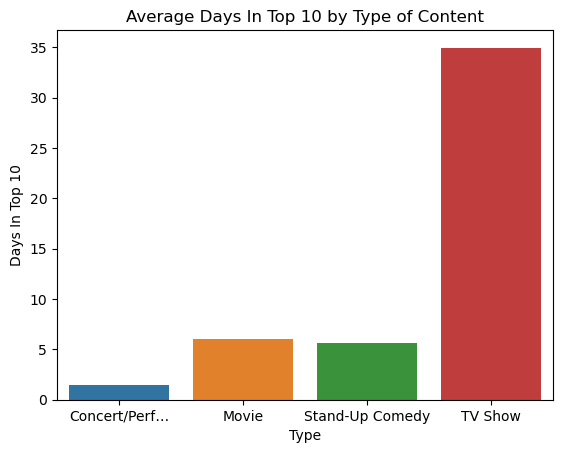

In [23]:
sns.barplot(data=df1, x='Type', y='Days In Top 10').set(title="Average Days In Top 10 by Type of Content")

[Text(0.5, 1.0, 'Viewership Score and Type of Content')]

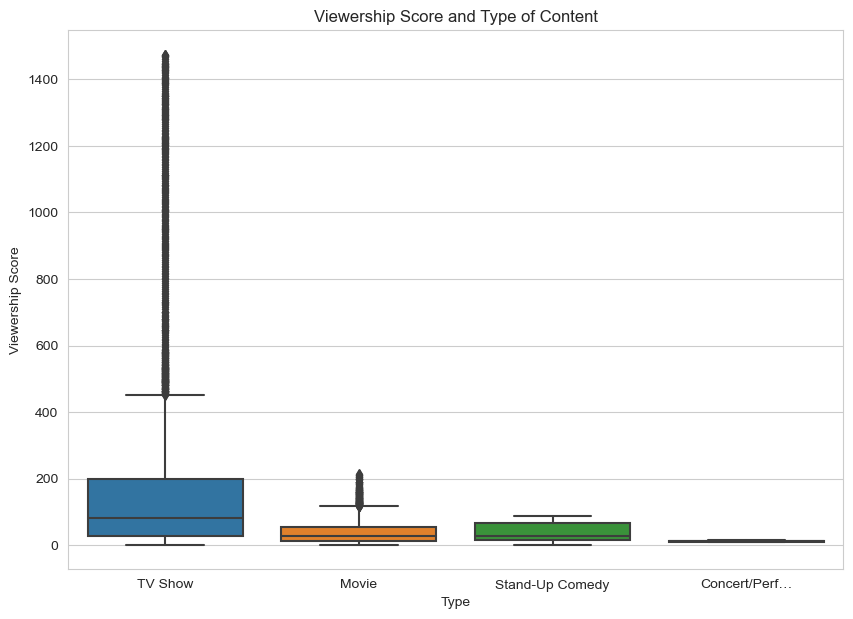

In [24]:
# look at another feature
fig = plt.figure(figsize =(10, 7))
sns.set_style("whitegrid")
sns.boxplot(x='Type', y='Viewership Score', data=df).set(title="Viewership Score and Type of Content")

Which TV shows stayed the longest in the top ten?

In [32]:
tv_shows = df[df['Type'] == 'TV Show']
tv_shows = tv_shows.groupby(['Title'])['Days In Top 10'].max().sort_values(ascending=False).head(10)

In [36]:
tv_shows = pd.DataFrame(tv_shows)
tv_shows

,Days In Top 10
Title,
Cocomelon,428
Ozark,89
Cobra Kai,81
Manifest,80
The Queenâs Gambit,73
Outer Banks,72
Squid Game,66
All American,66
Bridgerton,58


In [39]:
# convert index (containing Type values) to a column so we can use it in the plot below
tv_shows['Title']=tv_shows.index
tv_shows

,Days In Top 10,Title
Title,,
Cocomelon,428,Cocomelon
Ozark,89,Ozark
Cobra Kai,81,Cobra Kai
Manifest,80,Manifest
The Queenâs Gambit,73,The Queenâs Gambit
Outer Banks,72,Outer Banks
Squid Game,66,Squid Game
All American,66,All American
Bridgerton,58,Bridgerton


C:\Users\johan\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\johan\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


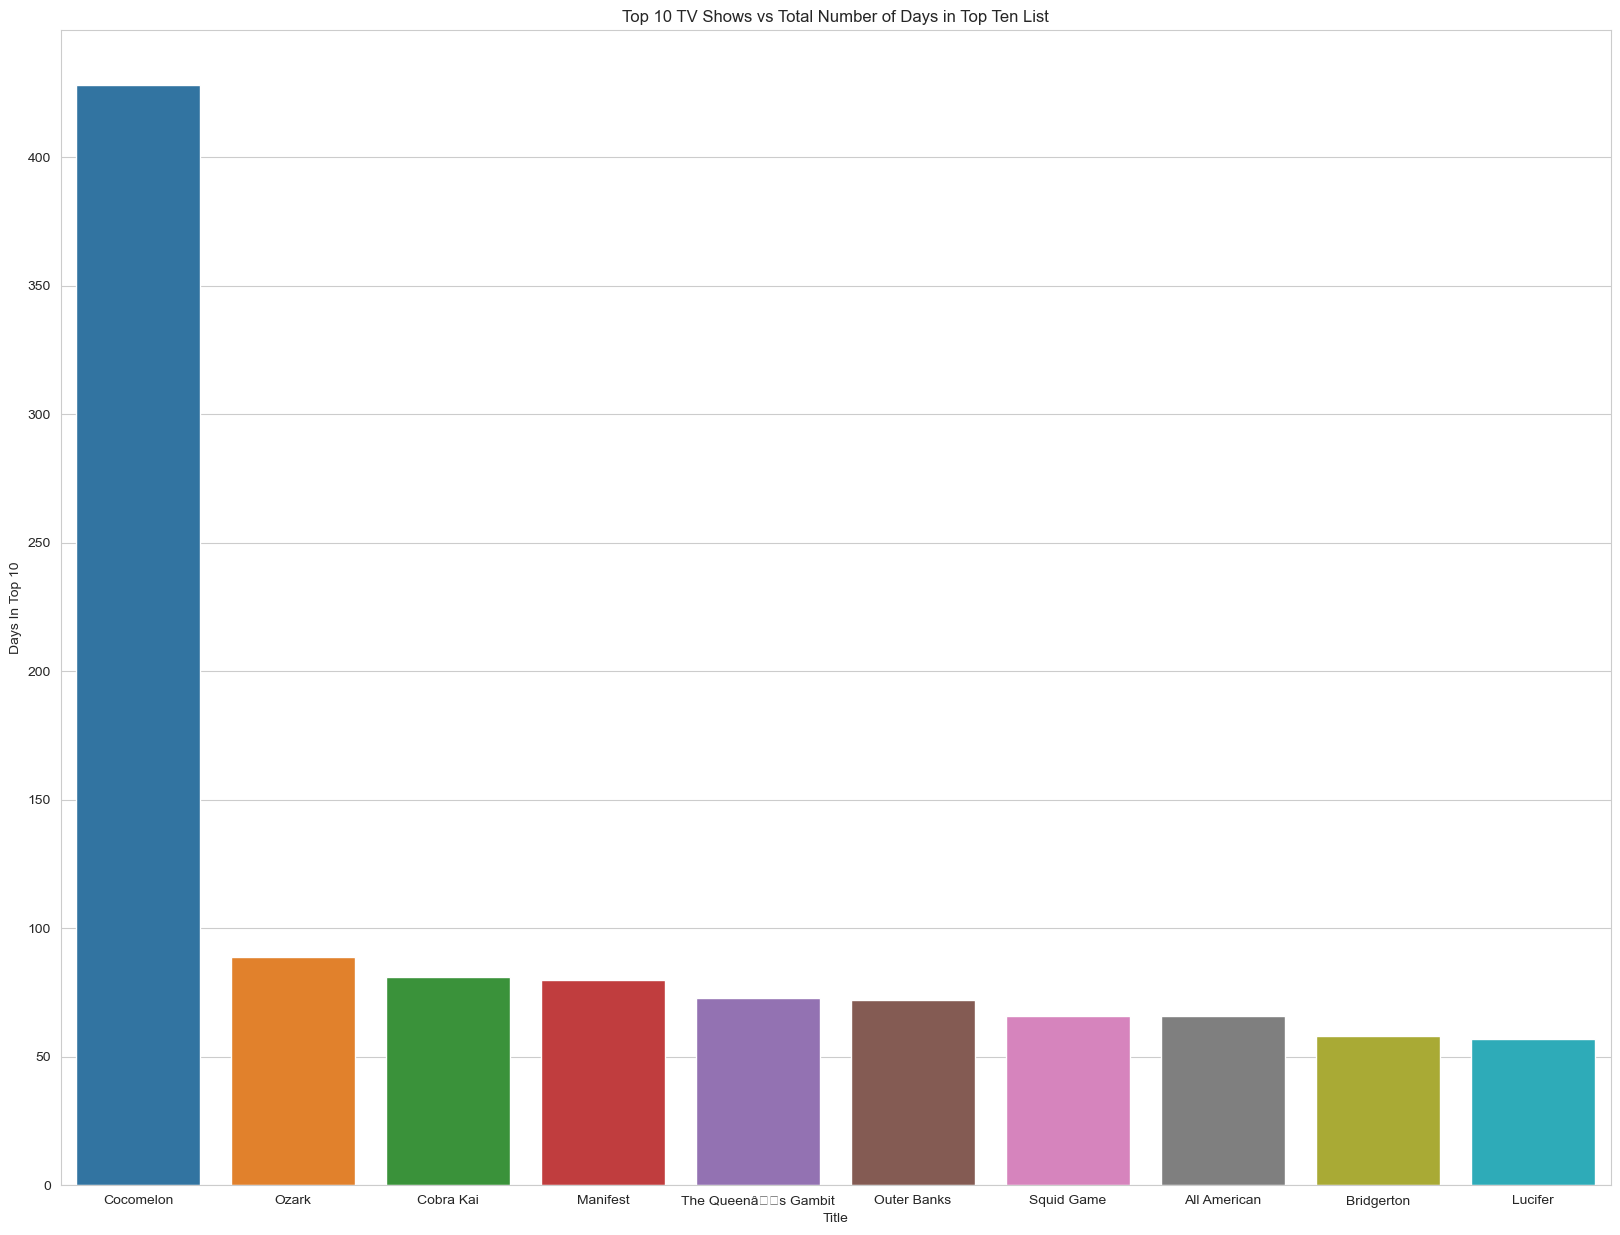

In [46]:
plt.figure(figsize=(20,15))
sns.barplot(data=tv_shows, x='Title', y='Days In Top 10').set(title="Top 10 TV Shows vs Total Number of Days in Top Ten List")
plt.show()